<a href="https://colab.research.google.com/github/giadung4141/-n/blob/main/Copy_of_NPL_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Kết nối Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
folder = '/content/gdrive/My Drive/Colab Notebooks/NLP'

Mounted at /content/gdrive


In [3]:
!apt-get install -y git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
#Thư viện cần thiết:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# Tắt những cảnh báo
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# PHẦN 1: TỔNG QUAN DỮ LIỆU

In [ ]:
data=pd.read_csv(folder +'/DisneylandReviews.csv',encoding='ISO-8859-1')
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


Thông tin cơ bản về file data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


#PHẦN 2: XÂY DỰNG MÔ HÌNH

###Tiền xử lý dữ liệu

In [ ]:
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [ ]:
#data trước khi tiền xử lý
df_main_class = data[["Review_Text","Rating"]]
df_main_class

,Review_Text,Rating
0,If you've ever been to Disneyland anywhere you...,4
1,Its been a while since d last time we visit HK...,4
2,Thanks God it wasn t too hot or too humid wh...,4
3,HK Disneyland is a great compact park. Unfortu...,4
4,"the location is not in the city, took around 1...",4
...,...,...
42651,i went to disneyland paris in july 03 and thou...,5
42652,2 adults and 1 child of 11 visited Disneyland ...,5
42653,My eleven year old daughter and myself went to...,5
42654,"This hotel, part of the Disneyland Paris compl...",4


#####Tiền xử lý dữ liệu

Gắn nhãn cho cột Rating

In [ ]:
# Gắn nhãn cho cột Rating
rating = data["Rating"]
def label_func(rating):
    if rating >=4:
        return "Positive"
    elif rating == 3:
            return "Neutral"
    else:
        return "Negative"

data["Sentiment"] = data["Rating"].apply(lambda x: label_func(x))

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

def clean_reviews(text):
    # removing html
    regex = re.compile('<.*?>')
    text = re.sub(regex, '', text)

    # removing special characters
    pattern = re.compile('[^a-zA-z0-9\s]')
    text = re.sub(pattern, '', text)

    # removing numbers
    pattern = re.compile('\d+')
    text = re.sub(pattern, '', text)

    # converting text to lower case
    text = text.lower()

    # Tokenization of words
    text = word_tokenize(text)

    # Lemmatization of words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]

    # Stop words removal
    text = [word for word in text if word not in stop_words]

    # Joining the words to form a string
    text = ' '.join(text)

    return text
data['Review_Text'] = data['Review_Text'].apply(clean_reviews)

In [ ]:
#data sau khi tiền xử lý
df_main_class = data[["Review_Text","Sentiment"]]
df_main_class

,Review_Text,Sentiment
0,youve ever disneyland anywhere youll find disn...,Positive
1,since last time visit hk disneyland yet time s...,Positive
2,thanks god hot humid wa visiting park otherwis...,Positive
3,hk disneyland great compact park unfortunately...,Positive
4,location city took around hour kowlon kid like...,Positive
...,...,...
42651,went disneyland paris july thought wa brillian...,Positive
42652,adult child visited disneyland paris beginning...,Positive
42653,eleven year old daughter went visit son london...,Positive
42654,hotel part disneyland paris complex wonderful ...,Positive


###Sentimental Analysis

####Word Cloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
all_words = ' '.join(word for word in data['Review_Text'])


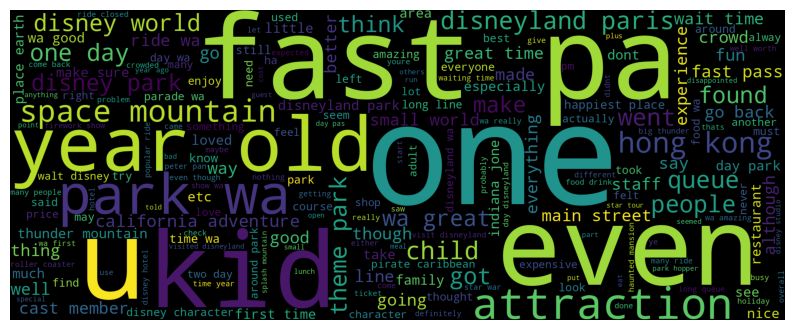

In [ ]:
wordcloud = WordCloud(
    width = 2000,
    height = 800,
    background_color = 'black').generate(all_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

####Generate n-grams unsing Textblob.

In [ ]:
from textblob import TextBlob

In [ ]:
polarity = []

for sentence in data["Review_Text"]:
    polarity.append(TextBlob(sentence).polarity)

In [ ]:
subjectivity = []

for sentence in data["Review_Text"]:
    subjectivity.append(TextBlob(sentence).subjectivity)

In [ ]:
data["textblob_polarity"], data["textblob_subjectivity"] = polarity, subjectivity

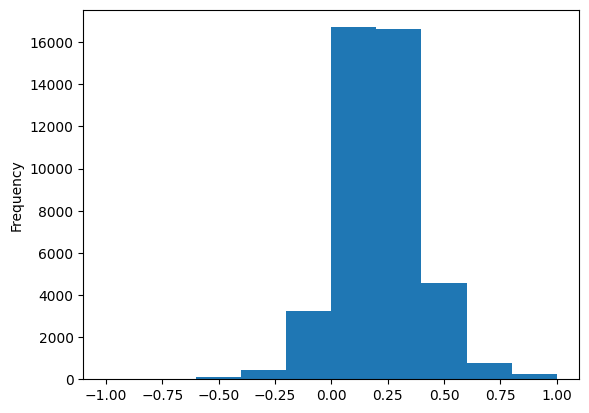

In [ ]:
data["textblob_polarity"].plot.hist();

<Axes: ylabel='Frequency'>

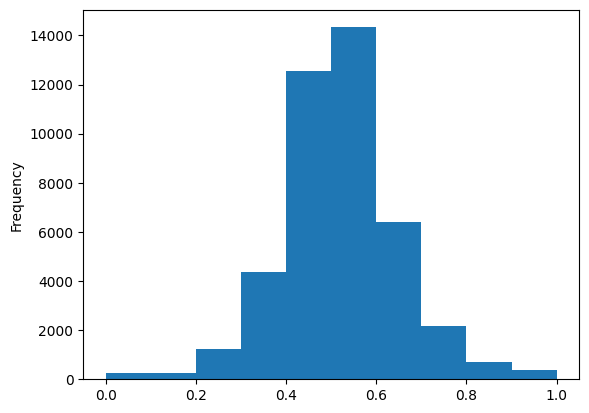

In [ ]:
data["textblob_subjectivity"].plot.hist()

In [ ]:
data['tb_Sentiment_Type'] = ''
data.loc[data["textblob_polarity"]>0,'tb_Sentiment_Type']='POSITIVE'
data.loc[data["textblob_polarity"]==0,'tb_Sentiment_Type']='NEUTRAL'
data.loc[data["textblob_polarity"]<0,'tb_Sentiment_Type']='NEGATIVE'

<Axes: >

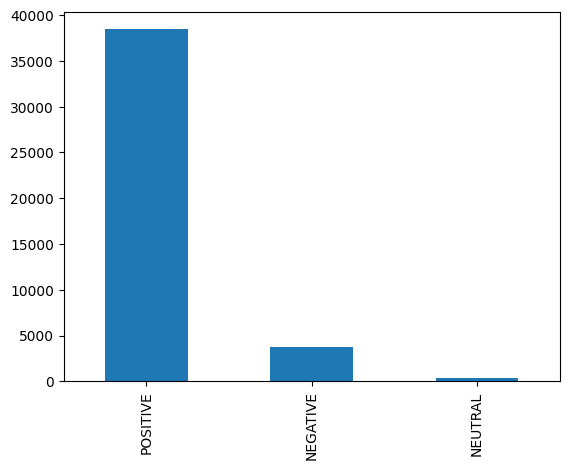

In [ ]:
data['tb_Sentiment_Type'].value_counts().plot.bar()

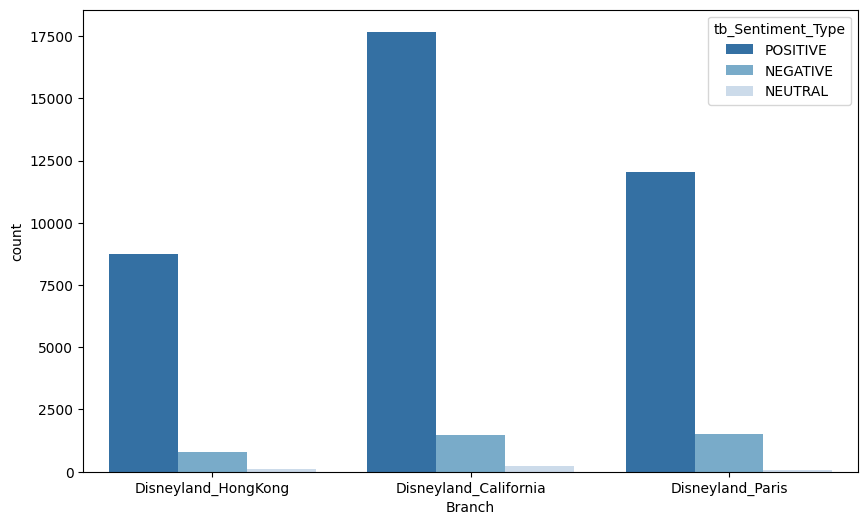

In [ ]:
# Sentiment type by branch
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Branch',hue='tb_Sentiment_Type',palette='Blues_r');

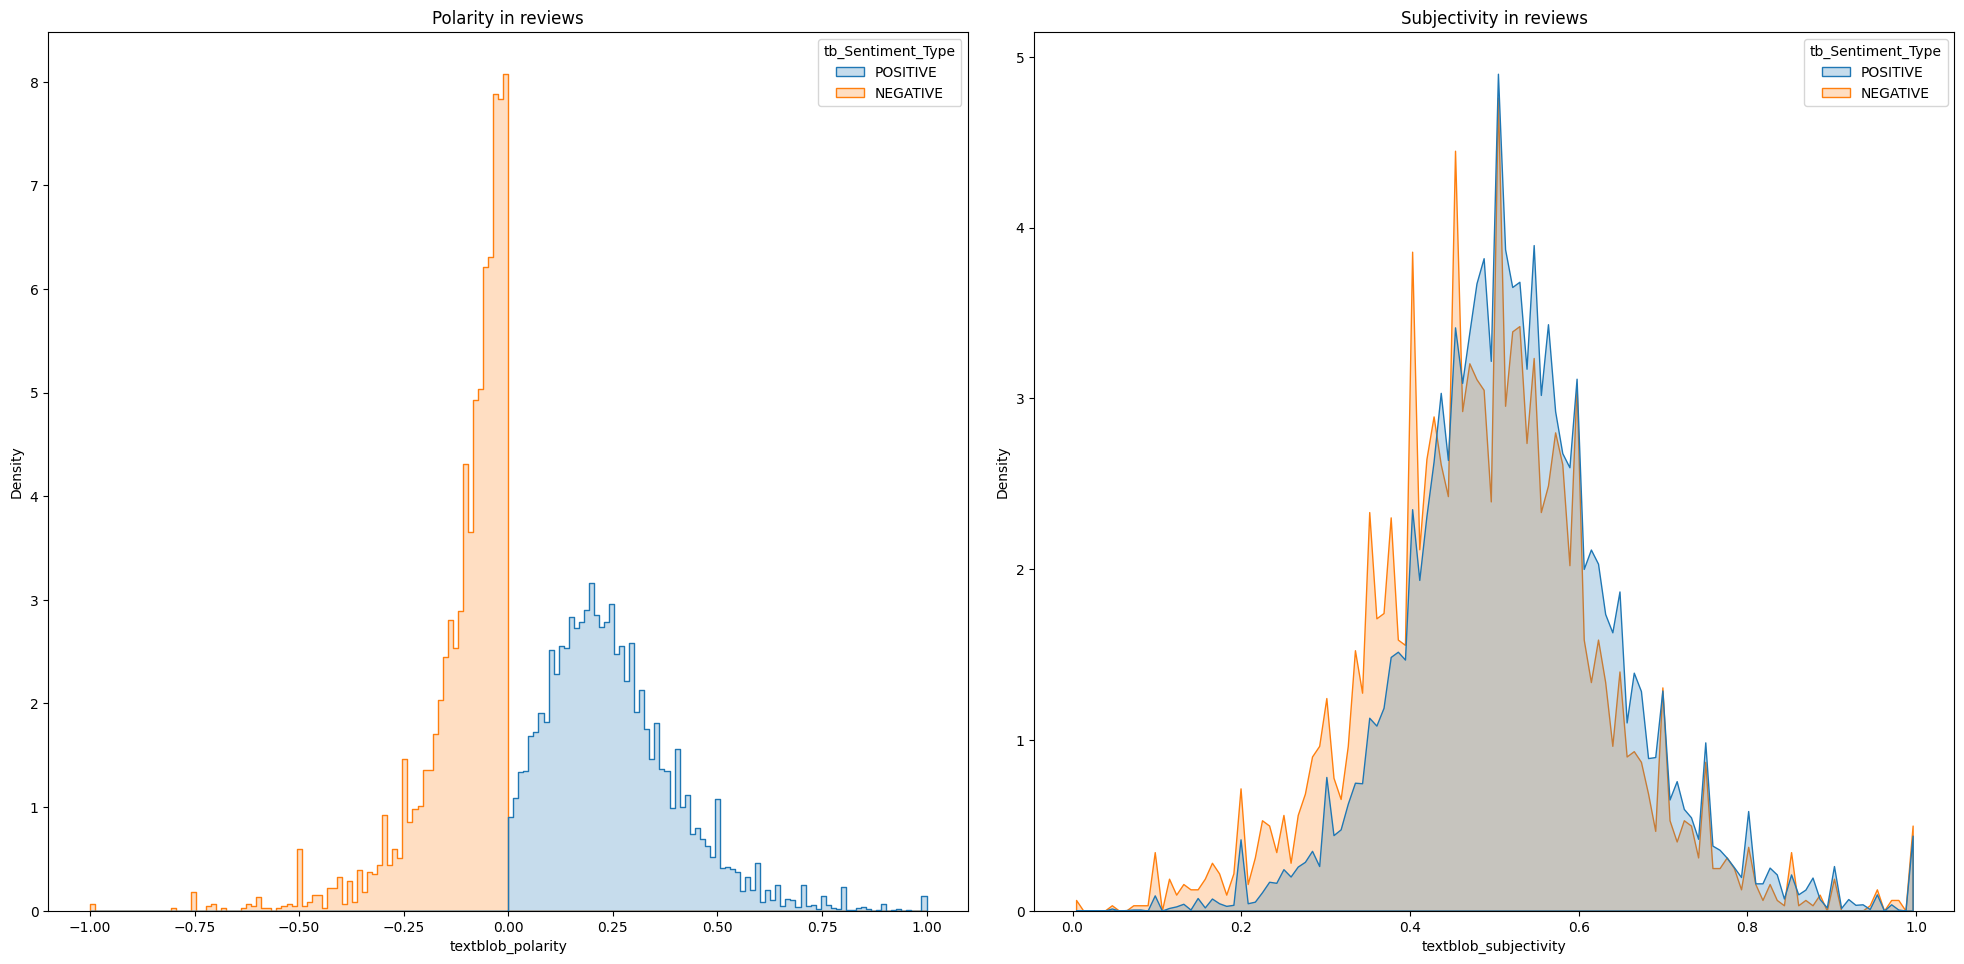

In [ ]:
data1 = data[data.tb_Sentiment_Type != 'NEUTRAL']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

sns.histplot(data1, x="textblob_polarity", hue="tb_Sentiment_Type", element="step",
             stat="density", common_norm=False, ax=ax1).set(title='Polarity in reviews')

sns.histplot(data1, x="textblob_subjectivity", hue="tb_Sentiment_Type", element="poly",
             stat="density", common_norm=False,ax=ax2).set(title='Subjectivity in reviews')

fig.tight_layout(pad=2.0)

####Vader

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.4 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
vs = []
for sentence in data["Review_Text"]:
    vs.append(analyzer.polarity_scores(sentence))

In [ ]:
data["vs_score"] = vs

In [ ]:
data['compound'] = data['vs_score'].apply(lambda score_dict: score_dict['compound'])
data['vs_sentiment_type']=''
data.loc[data.compound>0,'vs_sentiment_type']='POSITIVE'
data.loc[data.compound==0,'vs_sentiment_type']='NEUTRAL'
data.loc[data.compound<0,'vs_sentiment_type']='NEGATIVE'

<Axes: xlabel='Branch', ylabel='count'>

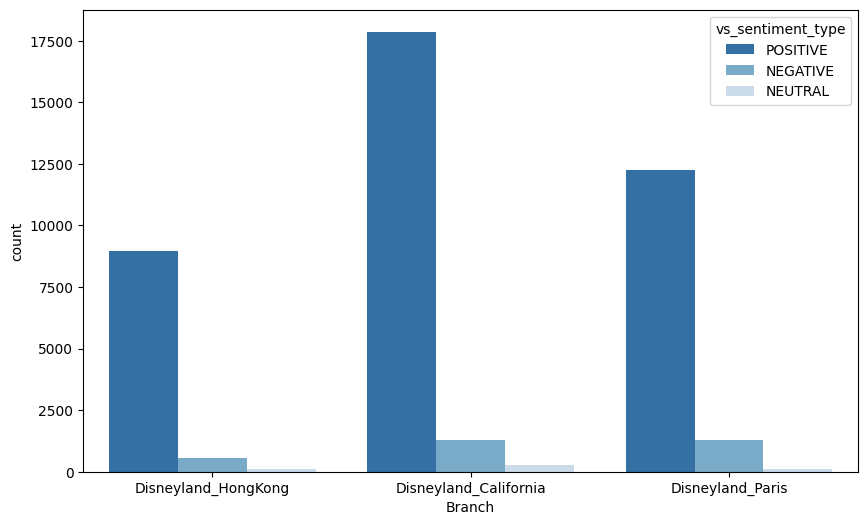

In [ ]:
# Sentiment type by branch
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Branch',hue='vs_sentiment_type',palette='Blues_r')

####Generate bigram-feature for a document

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
text=data['Review_Text']

In [ ]:
# create the transform
vectorizer = CountVectorizer(ngram_range=(2,2))
# tokenizing
vectorizer.fit(text)
# encode document
vector = vectorizer.transform(text)
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


####NLTK


In [ ]:
import nltk
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import state_union


In [ ]:
stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
text1 = " ".join(review for review in data["Review_Text"])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 42656 words in the combination of all review.


In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
nltk_score = []

for review in data["Review_Text"]:
    nltk_score.append(sia.polarity_scores(review))

In [ ]:
data["nltk_score"] = nltk_score

In [ ]:

data['nltk_compound'] = data['nltk_score'].apply(lambda score_dict: score_dict['compound'])
data['nltk_sentiment_type']=''
data.loc[data.nltk_compound>0,'nltk_sentiment_type']='POSITIVE'
data.loc[data.nltk_compound==0,'nltk_sentiment_type']='NEUTRAL'
data.loc[data.nltk_compound<0,'nltk_sentiment_type']='NEGATIVE'

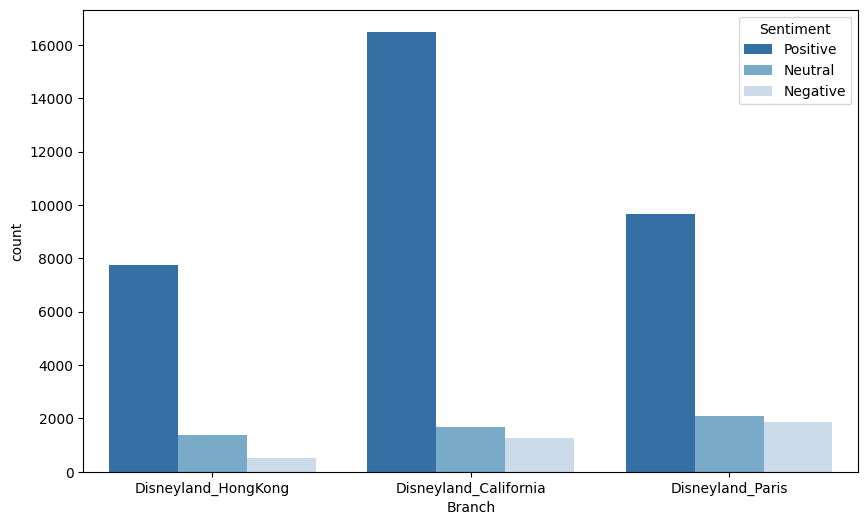

In [ ]:
# Sentiment type by branch
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Branch',hue='Sentiment',palette='Blues_r');

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

def reviewplot(sentiment):
    # review frequent word list:
    senti_review = data[data['nltk_sentiment_type']== sentiment]["Review_Text"]

    senti_text = " ".join(review for review in senti_review)
    senti_text = senti_text.lower()
    senti_text = re.sub('\W', ' ', senti_text)

    senti_tokens = word_tokenize(senti_text)
    snowball_stemmer = SnowballStemmer("english")
    stemmed_word = [snowball_stemmer.stem(word) for word in senti_tokens]
    stopwords = nltk.corpus.stopwords.words("english")
    senti_stopwords = [w for w in stemmed_word if w not in stopwords] # excluding stopwords

    #remove custom stop words
    my_stopwords = ['park', 'disney', 'disneyland', 'disney land', 'disney world', 'disneyworld',
                    'tokyo','paris', 'anaheim','california', 'hong kong','kong', 'hong']
    processed_text = [word for word in senti_stopwords if word not in my_stopwords]

    freq = FreqDist(processed_text)
    freq.most_common(10)

    fdist_df = pd.DataFrame.from_dict(freq, orient='index')
    fdist_df.columns = ['Frequency']
    fdist_df = fdist_df.sort_values(by='Frequency', ascending=False)[:10]

    return fdist_df

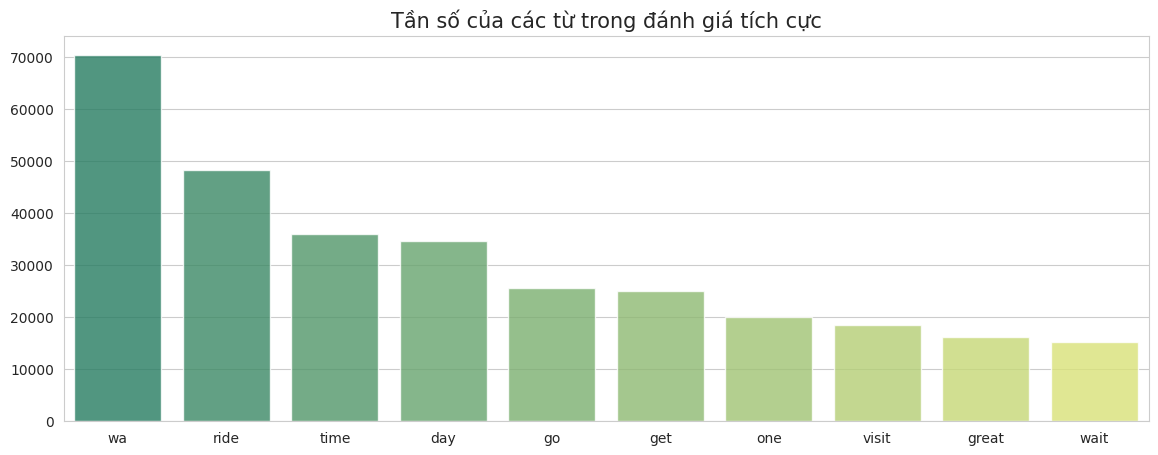

In [ ]:
# Positive review frequent word list:

adf = reviewplot('POSITIVE')

sns.set_style("whitegrid")
plt.figure(figsize=(14,5));

sns.barplot(x=adf.index,y=adf.Frequency.to_list(), alpha=0.8,palette="summer");
plt.title('Tần số của các từ trong đánh giá tích cực',fontsize=15);
plt.show();

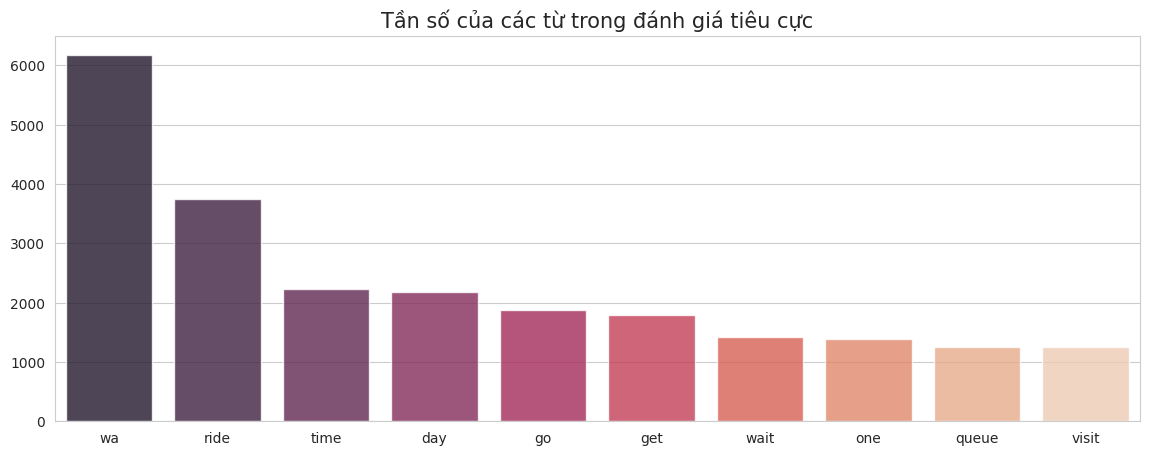

In [ ]:
# Negative review frequent word list:

adf = reviewplot('NEGATIVE')

sns.set_style("whitegrid")
plt.figure(figsize=(14,5));

sns.barplot(x=adf.index,y=adf.Frequency.to_list(), alpha=0.8,palette="rocket");
plt.title('Tần số của các từ trong đánh giá tiêu cực',fontsize=15);
plt.show();

####Emotion analysis

In [ ]:
!pip install nrclex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=e03112ad182f459901a5791be0196fc2b3d9083799878a2a3ee2d1e55d066bae
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built nrclex


In [ ]:
from nrclex import NRCLex

emotion = []
for i in range(len(data)):
    emotions = NRCLex(data['Review_Text'][i])
    emotion.append(emotions.top_emotions[0][0])
data['emotion'] = emotion

In [ ]:
data['emotion'].value_counts()

positive        29814
anticipation     5849
trust            2820
negative         2083
fear             1001
surprise          677
anger             363
sadness            32
joy                13
disgust             4
Name: emotion, dtype: int64

In [ ]:
def emotionbranch(branch):
    plt.figure(figsize=(10,5))

    data_ = data[data["Branch"]== branch]

    graph = sns.countplot(y="emotion", data=data_, palette="Set2");
    graph.set(xlabel='Frequency', ylabel='Emotion', title = 'Emotion from reviews ')


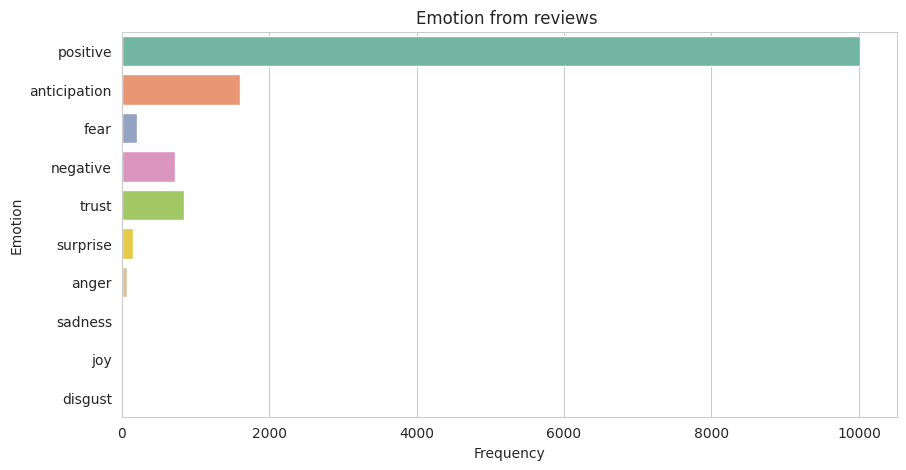

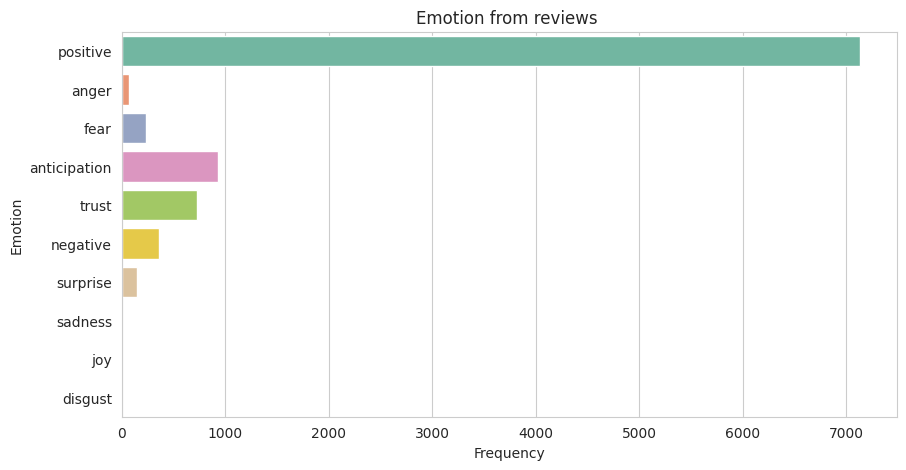

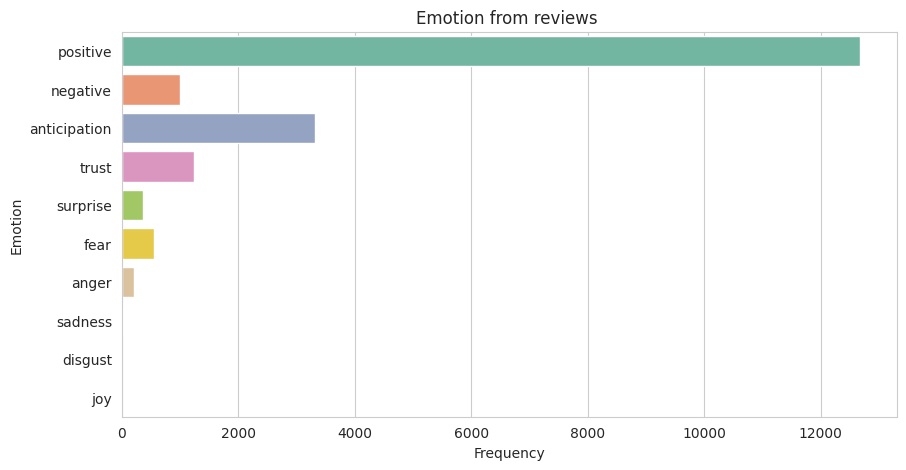

In [ ]:
for branch in ['Disneyland_Paris', 'Disneyland_HongKong', 'Disneyland_California']:
   emotionbranch(branch)

#### Tạo tập dữ liệu kiểm thử và kiểm tra

In [ ]:
from sklearn.model_selection import train_test_split
X = df_main_class['Review_Text']
y = df_main_class['Sentiment']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra với tỷ lệ 80-20 và đảm bảo phân phối đồng đều các lớp đánh giá
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)

print('Tập Train (80%): ', train_x.shape)
print('Tập Test (20%: ', test_x.shape)

Tập Train (80%):  (34124,)
Tập Test (20%:  (8532,)


###Xây dựng mô hình

##### Naive Bayes Model:


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Trích chọn đặc trưng theo phương pháp TF_IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vector =TfidfVectorizer(analyzer ='word',
                        max_features=35000,
                        stop_words = 'english')
vector.fit(df_main_class['Review_Text'])
xtrain_tfidf = vector.transform(train_x)
xtest_tfidf = vector.transform(test_x)
print('Kết quả vector hóa tập Train sang dạng số:')
print(xtrain_tfidf.data)
print(xtrain_tfidf.shape)
print('Kết quả vector hóa tập Test sang dạng số:')
print(xtest_tfidf.data)
print(xtest_tfidf.shape)

Kết quả vector hóa tập Train sang dạng số:
[0.10443389 0.06894211 0.07245709 ... 0.24082332 0.44093295 0.30857837]
(34124, 35000)
Kết quả vector hóa tập Test sang dạng số:
[0.06356125 0.29141832 0.12852096 ... 0.08389852 0.14622652 0.11414897]
(8532, 35000)


In [ ]:
from sklearn import naive_bayes as nb
from sklearn.model_selection import GridSearchCV

In [ ]:
# Sử dụng GridSearchCV để tìm alpha tốt nhất
MultiNB = nb.MultinomialNB()
alphas = {'alpha': [0.1, 0.25, 0.5, 0.75, 1.0]}
grid = GridSearchCV(estimator=MultiNB, param_grid=alphas, cv=5, scoring='accuracy')
grid.fit(xtrain_tfidf, train_y)
best_alpha = grid.best_params_['alpha']
print("Alpha tốt nhất:", best_alpha )

Alpha tốt nhất: 0.1


In [ ]:
#Sử dụng mô hình Naive Bayes với TF-IDF
#Sử dụng thuật toán MultinomialNB
MultiNB = nb.MultinomialNB(alpha=best_alpha, fit_prior=True)
MultiNB.fit(xtrain_tfidf, train_y)


MultinomialNB(alpha=0.1)

In [ ]:
import time
from sklearn.metrics import classification_report
# Huấn luyện mô hình với tập Train
MultiNB.fit(xtrain_tfidf, train_y)
train_score = MultiNB.score(xtrain_tfidf, train_y)
print(f'Độ chính xác của mô hình trên tập Train: {round(train_score*100,2)}%')

# Tính thời gian huấn luyện trên tập Train
start_time_train = time.time()
MultiNB.fit(xtrain_tfidf, train_y)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f'Thời gian huấn luyện trên tập Train: {train_time:.4f} giây')

#Sử dụng mô hình huấn luyện dự đoán trên tập Test
y_pred = MultiNB.predict(xtest_tfidf)
#Đánh giá mô hình trên tập Test
print('classification_report: \n', classification_report(test_y, y_pred))
# Tính thời gian dự đoán trên tập Test
start_time_test = time.time()
y_pred = MultiNB.predict(xtest_tfidf)
end_time_test = time.time()
test_time = end_time_test - start_time_test
print(f'Thời gian dự đoán trên tập Test: {test_time:.4f} giây')

Độ chính xác của mô hình trên tập Train: 86.27%
Thời gian huấn luyện trên tập Train: 0.4574 giây
classification_report: 
               precision    recall  f1-score   support

    Negative       0.68      0.27      0.39       725
     Neutral       0.37      0.05      0.09      1022
    Positive       0.83      0.99      0.90      6785

    accuracy                           0.82      8532
   macro avg       0.63      0.44      0.46      8532
weighted avg       0.76      0.82      0.76      8532

Thời gian dự đoán trên tập Test: 0.0095 giây


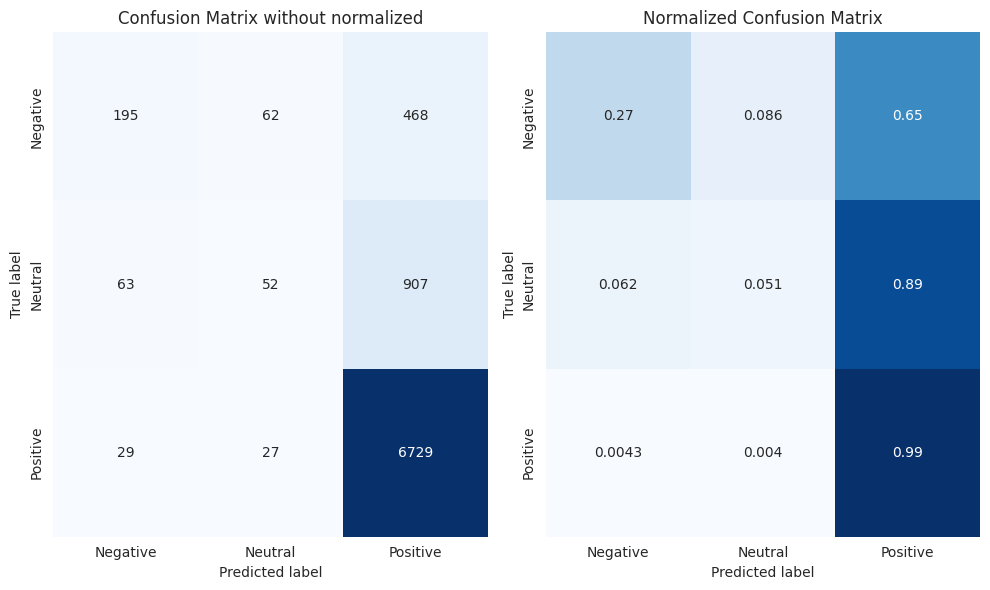

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Tính toán Confusion Matrix
conf_matrix = confusion_matrix(test_y, y_pred)

# Tính toán Confusion Matrix chuẩn hóa
norm_conf_matrix = confusion_matrix(test_y, y_pred, normalize='true')

# Lấy danh sách nhãn duy nhất từ test_y và sắp xếp chúng
labels = sorted(list(set(test_y)))

# Tạo figure và axes
fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # 1 hàng, 2 cột cho hai biểu đồ

# Biểu đồ Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[0])
axs[0].set_title("Confusion Matrix without normalized")
axs[0].set_xlabel("Predicted label")
axs[0].set_ylabel("True label")
axs[0].set_xticklabels(labels)
axs[0].set_yticklabels(labels)

# Biểu đồ Confusion Matrix chuẩn hóa
sns.heatmap(norm_conf_matrix, annot=True, cmap="Blues", cbar=False, ax=axs[1])
axs[1].set_title("Normalized Confusion Matrix")
axs[1].set_xlabel("Predicted label")
axs[1].set_ylabel("True label")
axs[1].set_xticklabels(labels)
axs[1].set_yticklabels(labels)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình Decision Tree với entropy làm tiêu chí cắt nhánh
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy')
decision_tree_entropy.fit(xtrain_tfidf, train_y)
# Đánh giá mô hình trên tập Test
y_pred = decision_tree_entropy.predict(xtest_tfidf)
print('classification_report: \n', classification_report(test_y, y_pred))
# Tính thời gian dự đoán trên tập Test
start_time_test = time.time()
y_pred = decision_tree_entropy.predict(xtest_tfidf)
end_time_test = time.time()
test_time = end_time_test - start_time_test
print(f'Thời gian dự đoán trên tập Test: {test_time:.4f} giây')


classification_report: 
               precision    recall  f1-score   support

    Negative       0.33      0.31      0.32       725
     Neutral       0.20      0.18      0.19      1022
    Positive       0.85      0.87      0.86      6785

    accuracy                           0.74      8532
   macro avg       0.46      0.46      0.46      8532
weighted avg       0.73      0.74      0.74      8532

Thời gian dự đoán trên tập Test: 0.0072 giây


BoW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Tạo một CountVectorizer
vectorizer = CountVectorizer(analyzer='word', max_features=20000, stop_words='english')

# Khớp dữ liệu văn bản vào vectorizer để tạo BoW
vectorizer.fit(df_main_class['Review_Text'])

# Chuyển đổi dữ liệu huấn luyện và kiểm tra thành dạng ma trận BoW
xtrain_bow = vectorizer.transform(train_x)
xtest_bow = vectorizer.transform(test_x)

# In ra thông tin về ma trận BoW
print('Kết quả vector hóa tập Train sang dạng số:')
print(xtrain_bow.toarray())
print(xtrain_bow.shape)
print('Kết quả vector hóa tập Test sang dạng số:')
print(xtest_bow.toarray())
print(xtest_bow.shape)


Kết quả vector hóa tập Train sang dạng số:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(34124, 20000)
Kết quả vector hóa tập Test sang dạng số:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(8532, 20000)


In [ ]:
#Sử dụng mô hình Naive Bayes với BoW
from sklearn import naive_bayes as nb

#Sử dụng thuật toán MultinomialNB
MultiNB = nb.MultinomialNB(alpha = 0.1, fit_prior=True)
MultiNB.fit(xtrain_bow, train_y)


MultinomialNB(alpha=0.1)

In [ ]:
from sklearn.metrics import accuracy_score
# Huấn luyện mô hình với tập Train
MultiNB.fit(xtrain_bow, train_y)

#Sử dụng mô hình huấn luyện dự đoán trên tập Test
y_pred = MultiNB.predict(xtest_bow)
#Đánh giá mô hình trên tập Test
print('classification_report: \n', classification_report(test_y, y_pred))
# Tính thời gian dự đoán trên tập Test
start_time_test = time.time()
y_pred = MultiNB.predict(xtest_bow)
end_time_test = time.time()
test_time = end_time_test - start_time_test
print(f'Thời gian dự đoán trên tập Test: {test_time:.4f} giây')

classification_report: 
               precision    recall  f1-score   support

    Negative       0.53      0.62      0.57       725
     Neutral       0.36      0.33      0.35      1022
    Positive       0.92      0.91      0.92      6785

    accuracy                           0.82      8532
   macro avg       0.60      0.62      0.61      8532
weighted avg       0.82      0.82      0.82      8532

Thời gian dự đoán trên tập Test: 0.0035 giây


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình Decision Tree với entropy làm tiêu chí cắt nhánh
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy')
decision_tree_entropy.fit(xtrain_bow, train_y)
# Đánh giá mô hình trên tập Test
y_pred = decision_tree_entropy.predict(xtest_bow)
print('classification_report: \n', classification_report(test_y, y_pred))
# Tính thời gian dự đoán trên tập Test
start_time_test = time.time()
y_pred = decision_tree_entropy.predict(xtest_bow)
end_time_test = time.time()
test_time = end_time_test - start_time_test
print(f'Thời gian dự đoán trên tập Test: {test_time:.4f} giây')


classification_report: 
               precision    recall  f1-score   support

    Negative       0.36      0.35      0.35       725
     Neutral       0.22      0.19      0.21      1022
    Positive       0.86      0.88      0.87      6785

    accuracy                           0.75      8532
   macro avg       0.48      0.47      0.48      8532
weighted avg       0.74      0.75      0.74      8532

Thời gian dự đoán trên tập Test: 0.0050 giây


#####MaxentClassifier(Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define a list of possible values for C
C_values = [0.1, 0.6, 0.7, 0.8, 1.0, 5.0, 10.0]

# Define a list of possible solvers
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Create a parameter grid
param_grid = {'C': C_values, 'solver': solvers}

# Perform grid search using cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain_tfidf, train_y)

# Get the best parameters
best_parameters = grid_search.best_params_
best_C = best_parameters['C']
best_solver = best_parameters['solver']

print("Best C:", best_C)
print("Best solver:", best_solver)

In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)
LogReg.fit(xtrain_tfidf, train_y)

In [ ]:
import time
from sklearn.metrics import accuracy_score
# Huấn luyện mô hình với tập Train
LogReg.fit(xtrain_tfidf, train_y)
train_score = LogReg.score(xtrain_tfidf, train_y)
print(f'Độ chính xác của mô hình trên tập Train: {round(train_score*100,2)}%')

# Tính thời gian huấn luyện trên tập Train
start_time_train = time.time()
LogReg.fit(xtrain_tfidf, train_y)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f'Thời gian huấn luyện trên tập Train: {train_time:.4f} giây')

#Sử dụng mô hình huấn luyện dự đoán trên tập Test
y_pred = LogReg.predict(xtest_tfidf)
#Đánh giá mô hình trên tập Test
print('classification_report: \n', classification_report(test_y, y_pred))
# Tính thời gian dự đoán trên tập Test
start_time_test = time.time()
y_pred = LogReg.predict(xtest_tfidf)
end_time_test = time.time()
test_time = end_time_test - start_time_test
print(f'Thời gian dự đoán trên tập Test: {test_time:.4f} giây')

In [ ]:
# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)
LogReg.fit(xtrain_bow, train_y)

In [ ]:
import time
from sklearn.metrics import accuracy_score
# Huấn luyện mô hình với tập Train
LogReg.fit(xtrain_bow, train_y)
train_score = LogReg.score(xtrain_bow, train_y)
print(f'Độ chính xác của mô hình trên tập Train: {round(train_score*100,2)}%')

# Tính thời gian huấn luyện trên tập Train
start_time_train = time.time()
LogReg.fit(xtrain_bow, train_y)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f'Thời gian huấn luyện trên tập Train: {train_time:.4f} giây')

#Sử dụng mô hình huấn luyện dự đoán trên tập Test
y_pred = LogReg.predict(xtest_bow)
#Đánh giá mô hình trên tập Test
print('classification_report: \n', classification_report(test_y, y_pred))
# Tính thời gian dự đoán trên tập Test
start_time_test = time.time()
y_pred = LogReg.predict(xtest_bow)
end_time_test = time.time()
test_time = end_time_test - start_time_test
print(f'Thời gian dự đoán trên tập Test: {test_time:.4f} giây')

In [ ]:
# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#####Deep Learning (RNN)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Embedding,  BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(df_main_class.columns)


Index(['Review_Text', 'Sentiment'], dtype='object')


In [ ]:
tokenizer = Tokenizer()
# chuyển đổi reviews thành list
reviews_to_list = df_main_class['Review_Text'].tolist()
tokenizer.fit_on_texts(reviews_to_list)
# Tạo chuỗi văn bản
text_sequences = np.array(tokenizer.texts_to_sequences(reviews_to_list))

# one hot encoding
df_main_class = pd.get_dummies(df_main_class, columns = ['Sentiment'])

# setting maximum words
max_words = 500

# X (input) to the model
# using pad_sequences and y (output)
X = pad_sequences(text_sequences, maxlen = max_words)
y = df_main_class[['Sentiment_Negative','Sentiment_Neutral','Sentiment_Positive']]
print(X.shape, y.shape)

(42656, 500) (42656, 3)


In [ ]:
# Creating a RNN model
rnn = Sequential(name="Simple_RNN")
rnn.add(Embedding(len(tokenizer.word_index)+1,
                        max_words,
                        input_length=max_words))

rnn.add(SimpleRNN(128,activation='relu',return_sequences=True))

rnn.add(SimpleRNN(64,activation='relu',return_sequences=False))

rnn.add(Dense(3, activation='softmax'))

# printing model summary
print(rnn.summary())

Model: "Simple_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 500)          32304000  
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 500, 128)          80512     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 32397059 (123.58 MB)
Trainable params: 32397059 (123.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra với tỷ lệ 80-20
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)

print('Tập Train (80%): ', train_x.shape)
print('Tập Test (20%: ', test_x.shape)

Tập Train (80%):  (34124, 500)
Tập Test (20%:  (8532, 500)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Compiling model
rnn.compile(
	loss="categorical_crossentropy",
	optimizer='adam',
	metrics=['accuracy']
)

#Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Training the model
history = rnn.fit(train_x, train_y,
						batch_size=64,
						epochs=50,
						verbose=1,
						validation_data = (test_x, test_y),
						callbacks=[early_stopping])

print("Simple_RNN Score---> ", rnn.evaluate(test_x, test_y, verbose=1))


Epoch 1/50
534/534 [==============================] - 993s 2s/step - loss: 0.5121 - accuracy: 0.8100 - val_loss: 0.5038 - val_accuracy: 0.8115
Epoch 2/50
534/534 [==============================] - 968s 2s/step - loss: nan - accuracy: 0.7601 - val_loss: nan - val_accuracy: 0.0850
Epoch 3/50
534/534 [==============================] - 980s 2s/step - loss: nan - accuracy: 0.0850 - val_loss: nan - val_accuracy: 0.0850
Epoch 4/50
267/267 [==============================] - 47s 175ms/step - loss: 0.5038 - accuracy: 0.8115
Simple_RNN Score--->  [0.5037605166435242, 0.8115330338478088]


Text(0, 0.5, 'Accuracy')

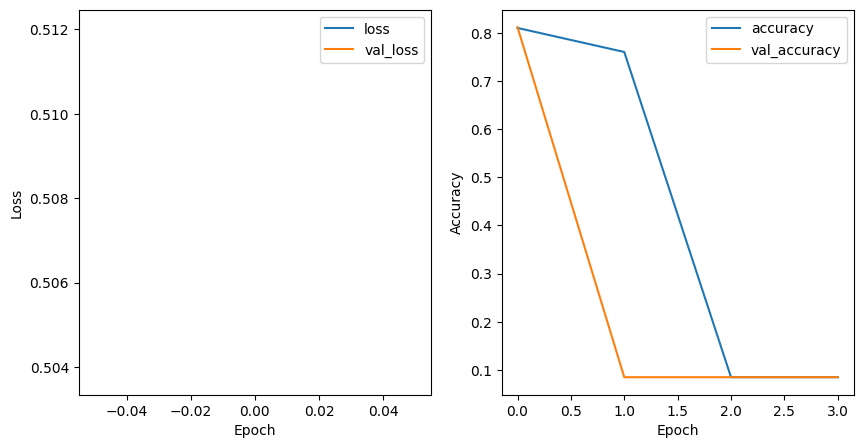

In [ ]:
# Plotting the history
metrics = history.history
plt.figure(figsize=(10, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.epoch, metrics['accuracy'],
		metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


In [ ]:
#confusion matrix
y_true = np.argmax(test_y.values, axis=1)
y_true.shape
y_pred = np.argmax(rnn.predict(test_x), axis=1)
# Tính toán Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Tính toán Confusion Matrix chuẩn hóa
norm_conf_matrix = confusion_matrix(y_true, y_pred, normalize='true')
# Lấy danh sách nhãn duy nhất từ test_y và sắp xếp chúng
labels = sorted(list(set(test_y)))

# Tạo figure và axes
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Biểu đồ Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[0])
axs[0].set_title("Confusion Matrix without normalized")
axs[0].set_xlabel("Predicted label")
axs[0].set_ylabel("True label")
axs[0].set_xticklabels(labels)
axs[0].set_yticklabels(labels)

# Biểu đồ Confusion Matrix chuẩn hóa
sns.heatmap(norm_conf_matrix, annot=True, cmap="Blues", cbar=False, ax=axs[1])
axs[1].set_title("Normalized Confusion Matrix")
axs[1].set_xlabel("Predicted label")
axs[1].set_ylabel("True label")
axs[1].set_xticklabels(labels)
axs[1].set_yticklabels(labels)

plt.tight_layout()
plt.show()


  1/267 [..............................] - ETA: 1:48

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)
